In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd

In [2]:
InputFileName='Retrieve_Router_Location.csv'
InputFileDir = 'C:/VKHCG/01-Vermeulen/01-Retrieve/01-EDS/02-Python'
OutputFileDir = 'C:/VKHCG/01-Vermeulen/02-Assess/01-EDS/02-Python'
OutputFileName1='Assess-DAG-Company-Country.png'
OutputFileName2='Assess-DAG-Company-Country-Place.png'

In [3]:
sFileName= InputFileDir + '/' + InputFileName
print('Loading :',sFileName)

Loading : C:/VKHCG/01-Vermeulen/01-Retrieve/01-EDS/02-Python/Retrieve_Router_Location.csv


In [4]:
CompanyData=pd.read_csv(sFileName,header=0,low_memory=False, encoding="latin-1")
print('Loaded Company :',CompanyData.columns.values)

Loaded Company : ['Country' 'Place_Name' 'Latitude' 'Longitude']


In [5]:
CompanyData.shape

(150, 4)

In [6]:
G1=nx.DiGraph()
G2=nx.DiGraph()

In [8]:
for i in range(CompanyData.shape[0]):
    G1.add_node(CompanyData['Country'][i])
    sPlaceName= CompanyData['Place_Name'][i] + '-' + CompanyData['Country'][i]
    G2.add_node(sPlaceName)

In [9]:
for n1 in G1.nodes():
    for n2 in G1.nodes():
        if n1 != n2:
            print('Link :',n1,' to ', n2)
            G1.add_edge(n1,n2)

Link : US  to  DE
Link : US  to  GB
Link : DE  to  US
Link : DE  to  GB
Link : GB  to  US
Link : GB  to  DE


In [10]:
print("Nodes of graph: ")
print(G1.nodes())
print("Edges of graph: ")
print(G1.edges())

Nodes of graph: 
['US', 'DE', 'GB']
Edges of graph: 
[('US', 'DE'), ('US', 'GB'), ('DE', 'US'), ('DE', 'GB'), ('GB', 'US'), ('GB', 'DE')]


In [11]:
sFileName=OutputFileDir + '/' + OutputFileName1
print('Storing :', sFileName)

Storing : C:/VKHCG/01-Vermeulen/02-Assess/01-EDS/02-Python/Assess-DAG-Company-Country.png


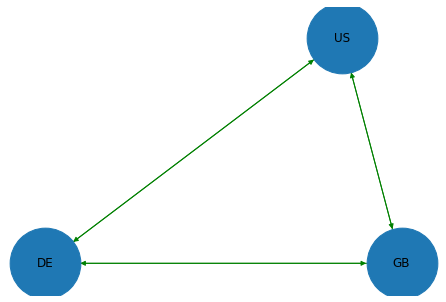

In [13]:
nx.draw(G1,pos=nx.spectral_layout(G1), 
        nodecolor='r',edge_color='g',
        with_labels=True,node_size=5000,
        font_size=12)
plt.savefig(sFileName) # save as png
plt.show() # display

In [14]:
for n1 in G2.nodes():
    for n2 in G2.nodes():
        if n1 != n2:
            print('Link :',n1,' to ', n2)
            G2.add_edge(n1,n2)
            
            

Link : New York-US  to  Munich-DE
Link : New York-US  to  London-GB
Link : Munich-DE  to  New York-US
Link : Munich-DE  to  London-GB
Link : London-GB  to  New York-US
Link : London-GB  to  Munich-DE


In [15]:
print("Nodes of graph: ")
print(G2.nodes())
print("Edges of graph: ")
print(G2.edges())

Nodes of graph: 
['New York-US', 'Munich-DE', 'London-GB']
Edges of graph: 
[('New York-US', 'Munich-DE'), ('New York-US', 'London-GB'), ('Munich-DE', 'New York-US'), ('Munich-DE', 'London-GB'), ('London-GB', 'New York-US'), ('London-GB', 'Munich-DE')]


In [16]:
sFileName=OutputFileDir + '/' + OutputFileName2
print('Storing :', sFileName)

Storing : C:/VKHCG/01-Vermeulen/02-Assess/01-EDS/02-Python/Assess-DAG-Company-Country-Place.png


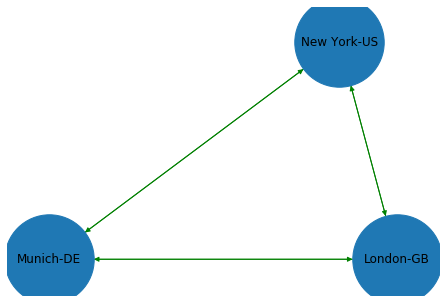

In [20]:
nx.draw(G2,pos=nx.spectral_layout(G2), 
        nodecolor='r',edge_color='g',
        with_labels=True,node_size=8000,
        font_size=12)
plt.savefig(sFileName) # save as png
plt.show() # display